https://archive.ics.uci.edu/ml/datasets/breast+cancer

Data Set Information:

This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)

This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal.


Attribute Information:

1. Class: no-recurrence-events, recurrence-events
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. menopause: lt40, ge40, premeno.
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. node-caps: yes, no.
7. deg-malig: 1, 2, 3.
8. breast: left, right.
9. breast-quad: left-up, left-low, right-up, right-low, central.
10. irradiat: yes, no.

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [5]:
# load the dataset
data = read_csv('BreastCancerRecurrence.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [35]:
# retrieve array
dataset = data.values
# split into input and output variables
X = dataset[:, :-1]
y = dataset[:,-1]
# format all fields as string
X = X.astype(str)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [37]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [38]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [49]:
X_train_enc

array([[ 3.,  0.,  4., ...,  0.,  3.,  0.],
       [ 1.,  2.,  9., ...,  0.,  3.,  0.],
       [ 3.,  2., 10., ...,  1.,  2.,  1.],
       ...,
       [ 4.,  0.,  1., ...,  1.,  1.,  0.],
       [ 4.,  0.,  7., ...,  1.,  1.,  0.],
       [ 4.,  0.,  8., ...,  0.,  0.,  0.]])

In [39]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [40]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [41]:
# summarize
print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [45]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [46]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [47]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.014825
Feature 1: 0.000000
Feature 2: 0.052855
Feature 3: 0.007414
Feature 4: 0.046472
Feature 5: 0.022419
Feature 6: 0.033661
Feature 7: 0.027155
Feature 8: 0.000000


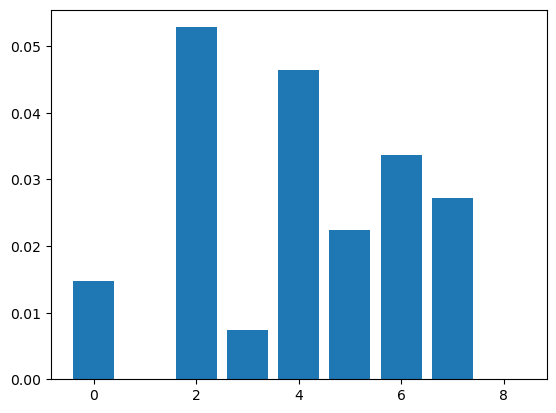

In [48]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()